In [1]:
import os
import math
import numpy as np
import matplotlib as mpl
from scipy.io import netcdf as nc
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
#from collections import OrderedDict
from matplotlib import cm
import csv
import warnings
warnings.filterwarnings('ignore')

# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

# colours for damage classes
viridis = cm.get_cmap('viridis', 10)
dm_colormap = viridis(range(10))

### high root N - damage only 

In [2]:
filename_in = 'V3/high_root_N_damage_e1b5bd9_354f0b0_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v1d_time = fin.variables['time'][:] / 365
v1dmdntime = len(v1d_time)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)

v1_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v1_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v1_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v1_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]

v1_NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:,:,:]
v1_NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:,:,:]
v1_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
v1_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v1_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v1_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v1_MORTALITY_UNDERSTORY_CDPF = fin.variables['MORTALITY_UNDERSTORY_CDPF'][:]
v1_MORTALITY_CANOPY_CDPF = fin.variables['MORTALITY_CANOPY_CDPF'][:]



fin.close()

### low root N - damage only 

In [3]:
filename_in = 'V3/low_root_N_damageonly_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)

v2_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v2_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v2_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v2_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]

v2_NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:,:,:]
v2_NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:,:,:]
v2_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:]
v2_M3_MORTALITY_UNDERSTORY_CDSC= fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:]
v2_MORTALITY_CANOPY_CDPF = fin.variables['MORTALITY_CANOPY_CDPF'][:]
v2_MORTALITY_UNDERSTORY_CDPF= fin.variables['MORTALITY_UNDERSTORY_CDPF'][:]
v2_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v2_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

fin.close()

### Figure

(3, 5)


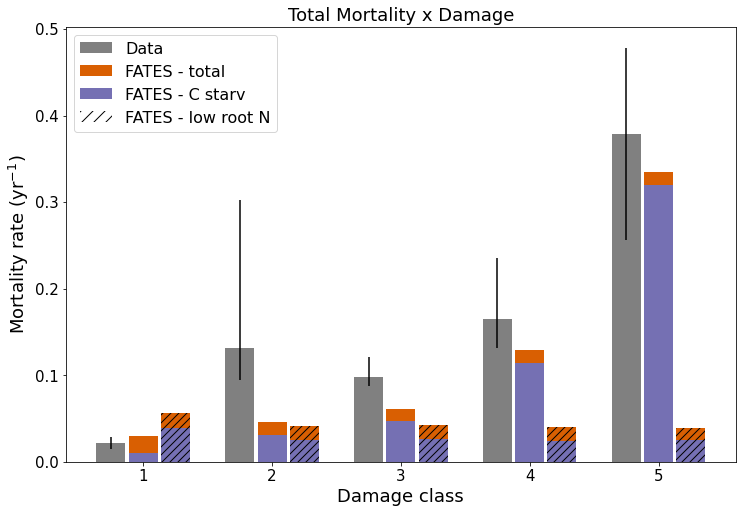

In [4]:
# total mortality by damage class 
# NB this does not include stems < 1 cm 

v1npl = np.delete(np.reshape(np.squeeze(v1_NPLANT_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2) 
v1tot_mort = np.delete(np.reshape(np.squeeze(v1_MORTALITY_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v1tot_prop = np.sum(v1tot_mort[4800:,:,:],axis=(0,2))/np.sum(v1npl[4800:,:,:],axis=(0,2))

v1m3_mort = np.delete(np.reshape(np.squeeze(v1_M3_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v1m3_prop = np.sum(v1m3_mort[4800:,:,:],axis=(0,2))/np.sum(v1npl[4800:,:,:],axis=(0,2))

v2npl = np.delete(np.reshape(np.squeeze(v2_NPLANT_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2) 
v2tot_mort = np.delete(np.reshape(np.squeeze(v2_MORTALITY_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v2tot_prop = np.sum(v2tot_mort[4800:,:,:],axis=(0,2))/np.sum(v2npl[4800:,:,:],axis=(0,2))

v2m3_mort = np.delete(np.reshape(np.squeeze(v2_M3_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v2m3_prop = np.sum(v2m3_mort[4800:,:,:],axis=(0,2))/np.sum(v2npl[4800:,:,:],axis=(0,2))



### BCI - mortality by damage class    
with open("r_mort_by_damage.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    next(reader, None)  # skip the headers
    data_read = [row for row in reader]

data_read = [float(x[1]) for x in data_read]
data_read = np.array(data_read)


### open error bars
res = np.loadtxt(open('r_mort_by_damage_by_cens.csv', 'rb'), delimiter=',', skiprows=1)
res = np.delete(res, 0, 1)
print(res.shape)

mini = data_read - np.min(res, axis=0)
maxi = np.max(res, axis=0) - data_read
yer = np.hstack((mini, maxi))
yer = np.reshape(yer, (2, 5))

ind = np.arange((ndamagebins*3)+4)
ind = np.delete(ind, (3, 7, 11, 15))

width = 0.9
  
fig6, ((f6ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(12,8))

f6ax0.bar(ind[::3], data_read, width, color='grey', yerr = yer)
f6ax0.bar(ind[::3]+1, v1tot_prop, width, color=colormap[1])
f6ax0.bar(ind[::3]+1, v1m3_prop, width, color=colormap[2])
f6ax0.bar(ind[::3]+2, v2tot_prop, width, color=colormap[1], hatch = "///")
f6ax0.bar(ind[::3]+2, v2m3_prop, width, color=colormap[2], hatch = "///")


f6ax0.set_ylabel(r'Mortality rate (yr$^{-1}$)', fontsize=18)
f6ax0.set_xlabel('Damage class', fontsize=18)
f6ax0.set_title('Total Mortality x Damage', fontsize=18)
f6ax0.set_xticks(ind[::3]+1)
f6ax0.tick_params(labelsize=15)
f6ax0.set_xticklabels(['1', '2', '3', '4', '5'])


colors = {'Data':'grey','FATES - total':colormap[1], 'FATES - C starv':colormap[2], 'FATES - low root N':'white'}         
labels = list(colors.keys())
hatches = {'Data':'', 'FATES - total':'', 'FATES - C starv':'', 'FATES - low root N':'//'}
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[label], hatch =hatches[label]) for label in labels]
ledg = plt.legend(handles, labels, loc='upper left', prop={'size':16})

plt.savefig("Figures_v3/mort_v_bci.png", format = 'png', dpi = 300)


### Mortality by damage by canopy layer

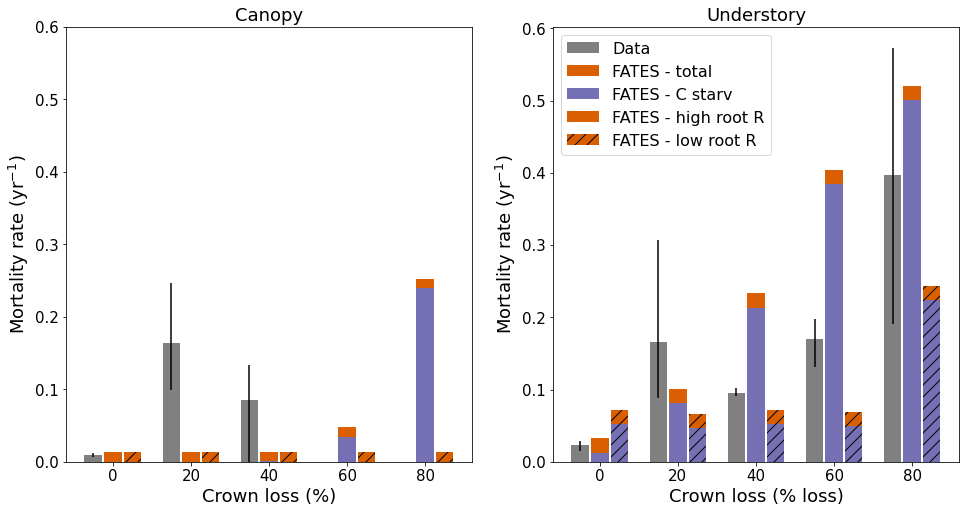

In [5]:
# total mortality by damage class 
# NB this does not include stems < 1 cm 

v1npl_u = np.delete(np.reshape(np.squeeze(v1_NPLANT_UNDERSTORY_CDPF), (v1dmdntime, ndamagebins, nsizebins)), 0, 2) 
v1tot_mort_u = np.delete(np.reshape(np.squeeze(v1_MORTALITY_UNDERSTORY_CDPF), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v1tot_prop_u = np.sum(v1tot_mort_u[4800:,:,:],axis=(0,2))/np.sum(v1npl_u[4800:,:,:],axis=(0,2))

v1m3_mort_u = np.delete(np.reshape(np.squeeze(v1_M3_MORTALITY_UNDERSTORY_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v1m3_prop_u = np.sum(v1m3_mort_u[4800:,:,:],axis=(0,2))/np.sum(v1npl_u[4800:,:,:],axis=(0,2))

v1npl_c = np.delete(np.reshape(np.squeeze(v1_NPLANT_CANOPY_CDPF), (v1dmdntime, ndamagebins, nsizebins)), 0, 2) 
v1tot_mort_c = np.delete(np.reshape(np.squeeze(v1_MORTALITY_CANOPY_CDPF), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v1tot_prop_c = np.sum(v1tot_mort_c[4800:,:,:],axis=(0,2))/np.sum(v1npl_c[4800:,:,:],axis=(0,2))

v1m3_mort_c = np.delete(np.reshape(np.squeeze(v1_M3_MORTALITY_CANOPY_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v1m3_prop_c = np.sum(v1m3_mort_c[4800:,:,:],axis=(0,2))/np.sum(v1npl_c[4800:,:,:],axis=(0,2))

v2npl_u = np.delete(np.reshape(np.squeeze(v2_NPLANT_UNDERSTORY_CDPF), (v1dmdntime, ndamagebins, nsizebins)), 0, 2) 
v2tot_mort_u = np.delete(np.reshape(np.squeeze(v2_MORTALITY_UNDERSTORY_CDPF), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v2tot_prop_u = np.sum(v2tot_mort_u[4800:,:,:],axis=(0,2))/np.sum(v2npl_u[4800:,:,:],axis=(0,2))

v2m3_mort_u = np.delete(np.reshape(np.squeeze(v2_M3_MORTALITY_UNDERSTORY_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v2m3_prop_u = np.sum(v2m3_mort_u[4800:,:,:],axis=(0,2))/np.sum(v2npl_u[4800:,:,:],axis=(0,2))

v2npl_c = np.delete(np.reshape(np.squeeze(v2_NPLANT_CANOPY_CDPF), (v1dmdntime, ndamagebins, nsizebins)), 0, 2) 
v2tot_mort_c = np.delete(np.reshape(np.squeeze(v2_MORTALITY_CANOPY_CDPF), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v2tot_prop_c = np.sum(v2tot_mort_c[4800:,:,:],axis=(0,2))/np.sum(v2npl_c[4800:,:,:],axis=(0,2))

v2m3_mort_c = np.delete(np.reshape(np.squeeze(v2_M3_MORTALITY_CANOPY_CDSC), (v1dmdntime, ndamagebins, nsizebins)), 0, 2)
v2m3_prop_c = np.sum(v2m3_mort_c[4800:,:,:],axis=(0,2))/np.sum(v2npl_c[4800:,:,:],axis=(0,2))


### BCI - mortality by damage class    
### open error bars
res_can = np.loadtxt(open('r_canopy_mort_by_damage_by_cens.csv', 'rb'), delimiter=',', skiprows=1)
res_can = np.delete(res_can, 0, 1)
res_usto = np.loadtxt(open('r_understory_mort_by_damage_by_cens.csv', 'rb'), delimiter=',', skiprows=1)
res_usto = np.delete(res_usto, 0, 1)

res_can_mu = np.mean(res_can, axis = 0)
res_usto_mu = np.mean(res_usto, axis = 0)

mini_can = res_can_mu - np.min(res_can, axis=0)
maxi_can = np.max(res_can, axis=0) - res_can_mu
yer_can = np.hstack((mini_can, maxi_can))
yer_can = np.reshape(yer_can, (2, 5))


mini_usto = res_usto_mu - np.min(res_usto, axis=0)
maxi_usto = np.max(res_usto, axis=0) - res_usto_mu
yer_usto = np.hstack((mini_usto, maxi_usto))
yer_usto = np.reshape(yer_usto, (2, 5))
#print(yer_usto)

ind = np.arange((ndamagebins*3)+4)
ind = np.delete(ind, (3, 7, 11, 15))


width = 0.9
  
fig6, ((f6ax0, f6ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(16,8))

f6ax0.bar(ind[::3], res_can_mu, width, color='grey', yerr = yer_can)
f6ax0.bar(ind[::3]+1, v1tot_prop_c, width, color=colormap[1])
f6ax0.bar(ind[::3]+1, v1m3_prop_c, width, color=colormap[2])
f6ax0.bar(ind[::3]+2, v2tot_prop_c, width, color=colormap[1], hatch = '//')
f6ax0.bar(ind[::3]+2, v2m3_prop_c, width, color=colormap[2], hatch = '//')


f6ax0.set_ylabel(r'Mortality rate (yr$^{-1}$)', fontsize=18)
f6ax0.set_xlabel('Crown loss (%)', fontsize=18)
f6ax0.set_title('Canopy', fontsize=18)
f6ax0.set_xticks(ind[::3]+1)
f6ax0.tick_params(labelsize=15)
f6ax0.set_xticklabels(['0', '20', '40', '60', '80'])
f6ax0.set_ylim(0,0.6)

colors = {'Data':'grey','FATES - total':colormap[1], 'FATES - C starv':colormap[2],  
          'FATES - high root R':colormap[1],'FATES - low root R':colormap[1]}         
labels = list(colors.keys())
hatches = {'Data':'', 'FATES - total':'', 'FATES - C starv':'','FATES - high root R':'', 'FATES - low root R':'//'}
handles = [plt.Rectangle((2,2),1,1, facecolor=colors[label], hatch =hatches[label]) for label in labels]
ledg = plt.legend(handles, labels, loc='upper left', prop={'size':16})


f6ax1.bar(ind[::3], res_usto_mu, width, color='grey', yerr = yer_usto)
f6ax1.bar(ind[::3]+1, v1tot_prop_u, width, color=colormap[1])
f6ax1.bar(ind[::3]+1, v1m3_prop_u, width, color=colormap[2])
f6ax1.bar(ind[::3]+2, v2tot_prop_u, width, color=colormap[1], hatch = '//')
f6ax1.bar(ind[::3]+2, v2m3_prop_u, width, color=colormap[2], hatch = '//')

f6ax1.set_ylabel(r'Mortality rate (yr$^{-1}$)', fontsize=18)
f6ax1.set_xlabel('Crown loss (% loss)', fontsize=18)
f6ax1.set_title('Understory', fontsize=18)
f6ax1.set_xticks(ind[::3]+1)
f6ax1.tick_params(labelsize=15)
f6ax1.set_xticklabels(['0', '20', '40', '60', '80'])


plt.savefig("Figures_v3/Figure_4.png", format = 'png', dpi = 300)
